<a href="https://colab.research.google.com/github/Kommandjsdf/MachineLearning/blob/main/Sup_Unsup_Learning/Sup_Unsup_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Аналіз спортивної команди"
Опис проєкту: Проєкт допомагає зрозуміти, як тренування впливають на результати гри команди, а також розподілити гравців за їхніми здібностями, щоб оптимізувати тренувальний процес.
1. Лінійна регресія: Прогноз очок у грі
Лінійна регресія використовується для передбачення результатів гри на основі тренувань.
Мета: Прогнозувати кількість очок команди залежно від часу тренувань.
Дані:
Training Hours (Години тренувань).
Game Points (Очки у грі).
2. Кластеризація: Розподіл гравців за здібностями
Кластеризація допомагає сегментувати гравців для оптимізації тренувань.
Мета: Групувати гравців за їхніми фізичними та ігровими показниками:
Speed (Швидкість).
Stamina (Витривалість).
Результат: Гравці розподілені в 3 категорії:
Швидкі та витривалі.
Середні за характеристиками.
Низька швидкість і витривалість.

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

1. Лінійна регресія: Прогноз очок у грі

In [33]:
np.random.seed(42)
training_hours = np.random.randint(1, 8, 30)
game_points = training_hours * 10 + np.random.randint(0, 20, 30)
print(training_hours)
print(game_points)

<class 'numpy.ndarray'>
[81 56 59 85 44 64 68 81 39 32 74 48 36 58 46 47 63 63 37 48 61 79 34 46
 61 17 54 22 73 66]


In [31]:
data = {
    "training_hours" : training_hours,
    "game_points" : game_points
}

df = pd.DataFrame(data)
df.head()

,training_hours,game_points
0,7,81
1,4,56
2,5,59
3,7,85
4,3,44


In [47]:
X = df[["training_hours"]]
y = df["game_points"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.5,
    random_state=42
)

    training_hours
27               2
15               3
23               4
17               5
8                2
9                3
28               6
24               5
12               3
0                7
4                3
16               6
5                5
13               5
11               3


In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

27    22
15    47
23    46
17    63
8     39
9     32
28    73
24    61
12    36
0     81
4     44
16    63
5     64
13    58
11    48
Name: game_points, dtype: int64


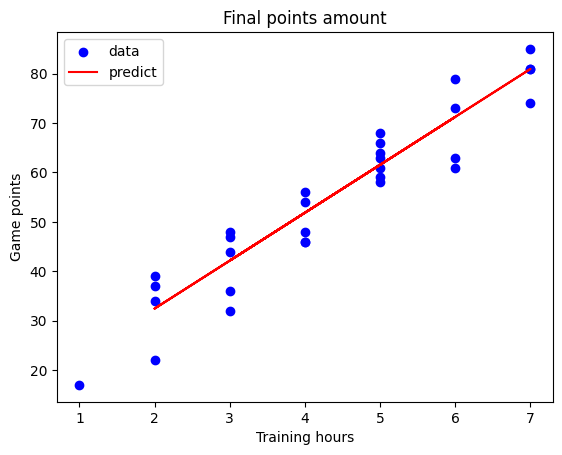

In [55]:
plt.scatter(X, y, color="blue", label="data")
plt.plot(X_test, y_pred, color="red", label="predict")
plt.title("Final points amount")
plt.xlabel("Training hours")
plt.ylabel("Game points")
plt.legend()
plt.show()